### Gradient Descent
---
Author: James D. Triveri


Gradient descent is a first-order iterative optimization algorithm commonly used in machine learning and optimization tasks to minimize the loss function of a model. Its primary goal is to find the minimum of a function by iteratively moving in the direction of steepest descent, which is the direction opposite to the gradient of the function. In this notebook, we'll demonstrate 3 variants of gradient descent, specifically:


- Batch Gradient Descent: Computes the gradient using the entire dataset.
- Mini-batch Gradient Descent: Computes the gradient using a small subset (mini-batch) of the dataset.
- Stochastic Gradient Descent (SGD): Computes the gradient using only one sample at a time.



### Background


The update expression for gradient descent is given by

$$
\theta_{\text{new}} = \theta_{\text{old}} - \eta \cdot \nabla L
$$

where:
- $\theta_{\text{new}}$ is the updated parameter.
- $\theta_{\text{old}}$ is the current parameter.
- $\eta$ is the learning rate.
- $\nabla L$ is the gradient of the loss function.

$\theta$ can be a single scalar, but more often that not it is a vector of real values. 


Within the context of ordinary least squares, we have a closed form expression to solve for model coefficients:

$$
\hat \theta = (X^{T}X)^{-1}X^{T}y.
$$

This is called the *normal equation*, where $X$ is an n-by-p + 1 matrix of predictors and $y$ an n-by-1 vector of target values where $n$ is the number of samples in the dataset and p is the number of features (the +1 is for the intercept term). Solving the normal equation gets very slow when the number of features grows large (e.g., 100,000). Also, computing (X^{T}X) increases the condition number and results in a loss of precision in the estimates. Instead we can opt for gradient descent, which will work much better for datasets with a large number of features and/or a large number of samples.


When solving least squares problems, the objective is to minimize the squared error between actual and predicted values. Formally, we aim to minimize

$$
MSE = \frac{1}{n} (y - X\theta)^{T}(y - X\theta),
$$

 
where $X\theta$ represents the predicted values. The derivative of this expression is:

$$
\nabla MSE = \nabla L = \frac{1}{n}X^{T}(y - X\theta).
$$

Once you have the gradient vector which points uphill, we need to point in the opposite direction
to go downhill since we want to minimize the loss. Thus our final gradient descent expression becomes:

$$
\theta_{\text{new}} = \theta_{\text{old}} - \eta \cdot \nabla L
$$

<br>

#### Batch Gradient Descent

The  formulas introduced above involve calculations over the full training set $X$, at 
each gradient descent step. It uses the whole batch of training data at every step. As a 
result it is very slow on large training sets. Nonetheless gradient descent scales well with 
the number of features; training a Linear Regression model when there are hundreds of 
thousands of features is much faster using gradient descent than using the normal equation.

In the next cell, we implement a simple version of batch gradient descent using only what we've 
covered so far. We first create a random dataset to demonstrate each of the three methods. This will be used in each subsequent example.



In [1]:

import numpy as np

np.set_printoptions(suppress=True, precision=5)
rng = np.random.default_rng(516)


X = rng.uniform(size=(100, 4))
y = (10 + 2.74 * rng.normal(size=100)).reshape(-1, 1)

# Append intercept term as first column of X.
X = np.concatenate([np.ones(X.shape[0]).reshape(-1, 1), X], axis=1)

# Display the first 10 rows of X.
X[:10, :]


array([[1.     , 0.07921, 0.65418, 0.02508, 0.44822],
       [1.     , 0.70387, 0.27594, 0.15054, 0.71786],
       [1.     , 0.89219, 0.8177 , 0.68969, 0.43149],
       [1.     , 0.99071, 0.18279, 0.06568, 0.1915 ],
       [1.     , 0.98649, 0.04318, 0.47184, 0.12332],
       [1.     , 0.62188, 0.39391, 0.30286, 0.91236],
       [1.     , 0.15353, 0.99573, 0.27239, 0.44323],
       [1.     , 0.85743, 0.64254, 0.73663, 0.45632],
       [1.     , 0.09887, 0.35665, 0.7069 , 0.15984],
       [1.     , 0.03841, 0.18323, 0.78278, 0.34711]])

<br>

Next we estimate the model coefficients using batch gradient descent. We compare the results obtained via gradient descent with the closed form solution obtained from the normal equation.

In [2]:

# Number of iterations.
n_iter = 1000

# Learning rate. 
lr = .10

# Initialize theta to random normal values.
theta = rng.normal(size=(X.shape[1], 1))

# Number of records in dataset.
n = X.shape[0]

# Normal equation coefficient estimates for comparison.
theta0 = np.linalg.inv((X.T @ X)) @ X.T @ y

# Track loss at each iteration.
loss = []

for _ in range(n_iter):
    dL = (2 / n) * X.T @ (X @ theta - y)
    theta = theta - lr * dL

    # Compute loss for visualization, not required for gradient update. 
    loss_ii = np.sum((X @ theta - y)**2).squeeze() / n
    loss.append(loss_ii)


print(f"theta estimated via batch gradient descent:\n{theta.ravel()}\n")
print(f"theta estimated via normal equation:\n{theta0.ravel()}")


theta estimated via batch gradient descent:
[10.28715  0.31627 -0.76708  1.34529 -1.63971]

theta estimated via normal equation:
[10.28906  0.31556 -0.76786  1.3442  -1.64097]


<br>
  
The results are similar. By increasing the number of iterations, the estimates of $\theta$ will get even closer.

We can plot loss as a function of iteration to visually assess convergence:


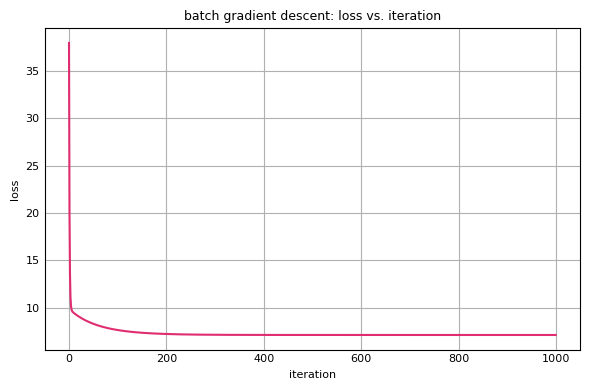

In [3]:

# Plot loss vs. iteration for first 100 updates. 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), tight_layout=True) 

xx, yy = zip(*enumerate(loss))
#xx = #xx[:100]
#yy = #yy[:100]

ax.set_title("batch gradient descent: loss vs. iteration", fontsize=9)
ax.plot(xx, yy, color="#E02C70")
ax.set_xlabel("iteration", fontsize=8)
ax.set_ylabel("loss", fontsize=8)
ax.tick_params(axis="x", which="major", direction='in', labelsize=8)
ax.tick_params(axis="x", which="minor", direction='in', labelsize=8)
ax.tick_params(axis="y", which="major", direction='in', labelsize=8)
ax.tick_params(axis="y", which="minor", direction='in', labelsize=8)
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.grid(True)
ax.set_axisbelow(True)

plt.show()


<br>

We see that the loss pretty much stabilizes after 100 iterations, although there is still a slight downward trend going forward. More sophisticated gradient decent variants incorporate early stopping: Instead of going through all 1000 iterations, when the loss between two iterations changes by a negligible amount we break out of the loop and use the last set of parameter values. A good exercise is to implement early stopping yourself for batch gradient descent.




#### Mini-batch Gradient Descent

Mini-batch gradient descent is a variation of batch gradient descent optimization. In batch gradient descent, the algorithm computes the gradient of the cost function with respect to the parameters of the model using the entire training dataset. Then, it updates the parameters in the opposite direction of the gradient to minimize the cost function.

However, when dealing with large datasets, computing the gradient using the entire dataset can be computationally expensive and memory-intensive. Mini-batch gradient descent addresses this issue by dividing the dataset into smaller subsets called mini-batches. Instead of computing the gradient using the entire dataset, the algorithm computes the gradient using only one mini-batch at a time. It then updates the parameters based on this mini-batch gradient.

The main advantage of mini-batch gradient descent is that it can significantly speed up the optimization process, especially for large datasets, as it allows for parallelization and efficient memory usage. Additionally, mini-batch gradient descent often leads to faster convergence compared to stochastic gradient descent (which uses a mini-batch size of 1) because it provides a smoother trajectory toward the minimum of the cost function. However, the choice of the mini-batch size is a hyperparameter that needs to be tuned, as it can affect the convergence and stability of the algorithm.





In [4]:

# Number of iterations.
n_iter = 1000

# Learning rate. Use a smaller learning rate since we're only working with 
# 1/10 of the data at each iteration. 
lr = .01

# Initialize theta to random normal values.
theta = rng.normal(size=(X.shape[1], 1))

# Use same X and y as we did for batch gradient descent.
# Create 10 mini batches from X and y.
batches = [X[(10 * ii):(10 + 10 * ii)] for ii in range(10)]
targets = [y[(10 * ii):(10 + 10 * ii)] for ii in range(10)]

# Track loss at each iteration.
loss = []


# Iterate over each mini-batch for each iteration. We now have a nested 
# looping structure. 
for _ in range(n_iter):

    for ii in range(len(batches)):

        X_ii, y_ii = batches[ii], targets[ii]

        # Same update step as in batch gradient descent, but with a 
        # smaller sample.
        dL = (2 / X_ii.shape[0]) * X_ii.T @ (X_ii @ theta - y_ii)
        theta = theta - lr * dL

        # Compute loss for visualization, not required for gradient update. 
        loss_ii = np.sum((X @ theta - y)**2).squeeze() / n
        loss.append(loss_ii)

    
print(f"theta estimated via mini-batch gradient descent:\n{theta.ravel()}\n")
print(f"theta estimated via normal equation:\n{theta0.ravel()}")



theta estimated via mini-batch gradient descent:
[10.30044  0.32505 -0.77541  1.33358 -1.6358 ]

theta estimated via normal equation:
[10.28906  0.31556 -0.76786  1.3442  -1.64097]


<br>

The results are very close. The big advantage of the mini-batch approach is that we can accommodate a dataset of any size, which is not the case when using batch gradient descent. Notice that the learning rate was reduced to 1/10 of the learning rate used in batch gradient descent. This is not an exact science, but it seems reasonable to reduce the learning rate based on the number of samples in each mini-batch. Here a value 1/10 of the original is used, since each mini-batch comprised 1/10 of the original dataset. In practice, experiment with the learning rate to assess which value returns the best possible results. 

Plotting the results again yields:
<br>



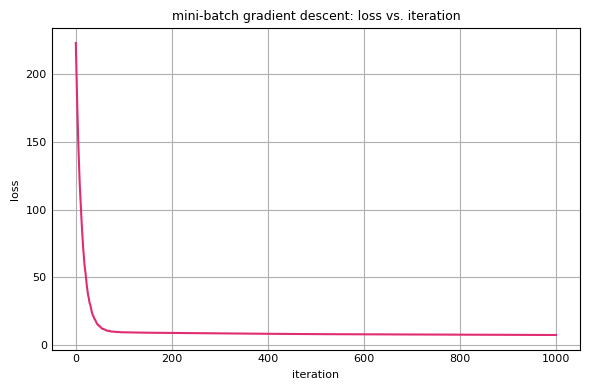

In [5]:


# Plot loss vs. iteration for first 100 updates. 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), tight_layout=True) 

xx, yy = zip(*enumerate(loss))
xx = xx[:1000]
yy = yy[:1000]

ax.set_title("mini-batch gradient descent: loss vs. iteration", fontsize=9)
ax.plot(xx, yy, color="#E02C70")
ax.set_xlabel("iteration", fontsize=8)
ax.set_ylabel("loss", fontsize=8)
ax.tick_params(axis="x", which="major", direction='in', labelsize=8)
ax.tick_params(axis="x", which="minor", direction='in', labelsize=8)
ax.tick_params(axis="y", which="major", direction='in', labelsize=8)
ax.tick_params(axis="y", which="minor", direction='in', labelsize=8)
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.grid(True)
ax.set_axisbelow(True)

plt.show()



<br>

Convergence seems a bit slower for mini-batch gradient descent, which is what we'd expect. But we're still converging to the same optimum.

<br>


#### Stochastic Gradient Descent

Stochastic gradient descent (SGD) is a variant of the gradient descent optimization algorithm commonly used to train machine learning models, particularly in scenarios with large datasets. Stochastic gradient descent computes the gradient using only one randomly chosen training example at a time. This is similar to mini-batch gradient descent, but using a batch size of 1. 
The key difference between stochastic gradient descent and batch gradient descent is that SGD updates the parameters after processing each individual training example, rather than waiting to process the entire dataset before making updates. This leads to faster updates and can be more computationally efficient, especially for large datasets. However, the updates can be noisy due to the randomness introduced by processing individual examples, which can sometimes result in erratic convergence behavior.

Despite its noise, stochastic gradient descent is often preferred for its efficiency, particularly in scenarios where computational resources are limited or when dealing with large-scale datasets.

Our code for SGD is virtually identical to the code for mini-batch, except we choose sample indices at random at each iteration:

In [6]:



# Number of iterations.
n_iter = 1000

# Learning rate. Use a smaller learning rate since we're only working with 
# 1/100 of the data at each iteration. 
lr = .001

# Initialize theta to random normal values.
theta = rng.normal(size=(X.shape[1], 1))

# Use same X and y as we did for batch gradient descent.
# Create 100 mini batches from X and y.
batches = [X[(ii):(1 + ii)] for ii in range(100)]
targets = [y[(ii):(1 + ii)] for ii in range(100)]

# Create shuffled sequence of indices.
indices = rng.choice(100, size=100, replace=False)

# Track loss at each iteration.
loss = []


# Iterate over each mini-batch for each iteration. We now have a nested 
# looping structure. 
for _ in range(n_iter):

    for ii in indices:

        X_ii, y_ii = batches[ii], targets[ii]

        # Same update step as in batch gradient descent, but with a 
        # smaller sample.
        dL = (2 / X_ii.shape[0]) * X_ii.T @ (X_ii @ theta - y_ii)
        theta = theta - lr * dL

        # Compute loss for visualization, not required for gradient update. 
        loss_ii = np.sum((X @ theta - y)**2).squeeze() / n
        loss.append(loss_ii)

    
print(f"theta estimated via stochastic gradient descent:\n{theta.ravel()}\n")
print(f"theta estimated via normal equation:\n{theta0.ravel()}")


theta estimated via stochastic gradient descent:
[10.27927  0.30938 -0.78915  1.3597  -1.6309 ]

theta estimated via normal equation:
[10.28906  0.31556 -0.76786  1.3442  -1.64097]


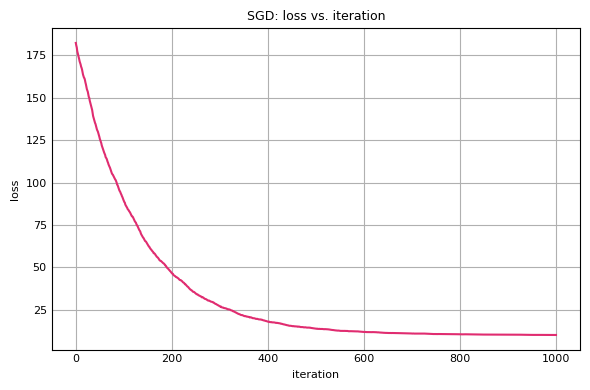

In [7]:


# Plot loss vs. iteration for first 100 updates. 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), tight_layout=True) 

xx, yy = zip(*enumerate(loss))
xx = xx[:1000]
yy = yy[:1000]

ax.set_title("SGD: loss vs. iteration", fontsize=9)
ax.plot(xx, yy, color="#E02C70")
ax.set_xlabel("iteration", fontsize=8)
ax.set_ylabel("loss", fontsize=8)
ax.tick_params(axis="x", which="major", direction='in', labelsize=8)
ax.tick_params(axis="x", which="minor", direction='in', labelsize=8)
ax.tick_params(axis="y", which="major", direction='in', labelsize=8)
ax.tick_params(axis="y", which="minor", direction='in', labelsize=8)
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.grid(True)
ax.set_axisbelow(True)

plt.show()



<br>

SGD converges to the same set of parameter values as batch and mini-batch gradient descent, but converges much more slowly and with a little more noise. 